# Individual Project Proposal - Yolanda Peng

In [3]:
# loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# PART 1: Data Description

In [4]:
# reading in data
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")

players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


### Explaining the datasets
The observations from the above datasets were collected through a Minecraft server created by a UBC Computer Science research group led by Frank Wood studying how individuals play video games. The server was hosted through PLAICraft and players' actions and information were recorded as they navigated through the world. The first dataset includes information about a list of all unique players, including data about each player. The second dataset refers to a list of individual play sessions by each player, including data about the session. 

In [5]:
# Calculating Summary Statistics

print("players.csv summary statistics")
players_summary <- summary(players_data) 
players_summary

print("sessions.csv summary statistics")
sessions_summary <- summary(sessions_data)
sessions_summary


[1] "players.csv summary statistics"


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "sessions.csv summary statistics"


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [6]:
print("**players.csv summary statistics rounded**")

# summary of played_hours in players.csv data rounded
players_mean_hours <- players_data |>
                summarise(mean_hours = mean(played_hours)) |>
                round(2) |>
                pull()
players_median_hours <- players_data |>
                summarise(median_hours = median(played_hours)) |>
                round(2) |>
                pull()
players_min_hours <- players_data |>
                summarise(min_hours = min(played_hours)) |>
                round(2) |>
                pull()
players_max_hours <- players_data |>
                summarise(max_hours = max(played_hours)) |>
                round(2) |>
                pull()
print(paste("mean time played (hr): ", players_mean_hours))
print(paste("median time played (hr): ", players_median_hours))
print(paste("max time played (hr): ", players_max_hours))
print(paste("min time played (hr): ", players_min_hours))

# summary of age in players.csv data rounded
players_mean_age <- players_data |>
                summarise(mean_age = mean(Age, na.rm = TRUE)) |>
                round(2) |>
                pull()
players_median_age <- players_data |>
                summarise(median_age = median(Age, na.rm = TRUE)) |>
                round(2) |>
                pull()
players_min_age <- players_data |>
                summarise(min_age = min(Age, na.rm = TRUE)) |>
                round(2) |>
                pull()
players_max_age <- players_data |>
                summarise(max_age = max(Age, na.rm = TRUE)) |>
                round(2) |>
                pull()

print(paste("mean age (year): ", players_mean_age))
print(paste("median age (year): ", players_median_age))
print(paste("max age (year): ", players_max_age))
print(paste("min age (year): ", players_min_age))

[1] "**players.csv summary statistics rounded**"
[1] "mean time played (hr):  5.85"
[1] "median time played (hr):  0.1"
[1] "max time played (hr):  223.1"
[1] "min time played (hr):  0"
[1] "mean age (year):  21.14"
[1] "median age (year):  19"
[1] "max age (year):  58"
[1] "min age (year):  9"


### Descriptive Summary
#### `players.csv` Dataset
- There are a total of **196 observations** included in this dataset (corresponding to the number of rows)
- There are a total of **7 variables** (corresponding to the number of columns): 
    - `experience` - How much experience a user has with the game; 5 categories: `Veteran`, `Pro`, `Regular`, `Beginner`, `Amateur`
    - `subscribe` - Whether the player is subscribed to a game-related newsletter, can be `TRUE` or `FALSE`
    - `hashedEmail` - The email of the player, hashed for privacy/anonymity reasons
    - `played_hours` - The amount of time the player spent playing the game in hours
    - `name` - The provided name of the player
    - `gender` - The gender of the player, specified by the player
    - `Age` - The age of the player in years, provided by the player
<br>
<br>

 - Variable types:
    - `experience`, `hashedEmail`, `name`, `gender` has type `<chr>`
    - `played_hours`, `Age` has type `<dbl`
    - `subscribe` has type `<lgl>`

### Issues with the Data
Some issues I see in the data include unclear representations of `original_start_time` and `original_end_time` and their units, making it difficult to compute session lengths without an additional variable for duration. The `hashedEmail` values are also lengthy and not human-readable, which potentially complicates comparing/relating data from the player and session datasets.

# PART 2: Questions

The broad question I am looking to address is **which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.** The specific question I will address is: **Can `experience` and `gender` predict `played_hours` in the `players.csv` dataset?** The `players.csv` dataset already includes the predictor and response variables needed to answer the question although it will be necessary to convert the `experience` and `gender` variables to a categorial type rather than `<chr>`.

# PART 3: Exploratory Data Analysis and Visualization 

In [7]:
# wrangling players.csv
players_data_wrangled <- players_data |>
                as_tibble() |>
                mutate(experience = as_factor(experience), gender = as_factor(gender))
players_data_wrangled

# wrangling sessions.csv
sessions_data_wrangled <- sessions_data |>
                as_tibble() |>
                mutate(start_time = as_datetime(start_time), end_time = as_datetime(end_time))
sessions_data_wrangled

# creating players.csv mean value table
players_mean_table <- tibble(variable = c("played_hours", "Age"), mean = c(players_mean_hours, players_mean_age)) |>
                      mutate(mean = unlist(mean))
players_mean_table

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2028-07-21 00:15:36,2028-07-21 00:15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2025-07-21 00:06:15,2025-07-21 00:06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2020-05-21 00:02:26,2020-05-21 00:02:45,1.71617e+12,1.71617e+12


variable,mean
<chr>,<dbl>
played_hours,5.85
Age,21.14


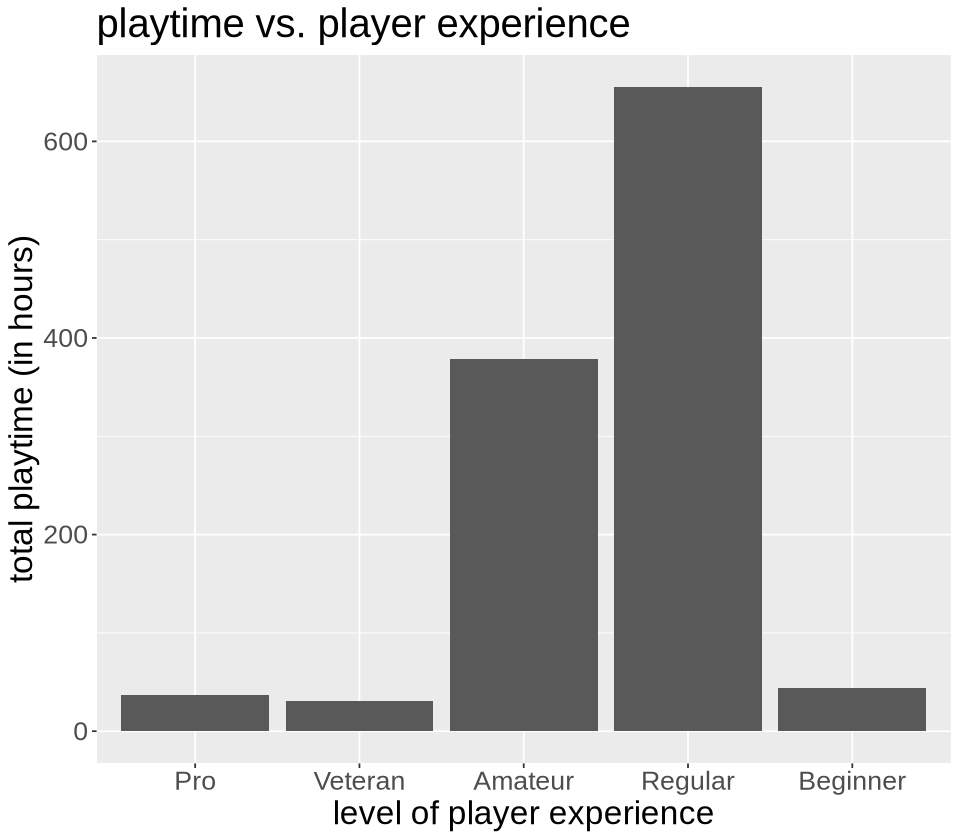

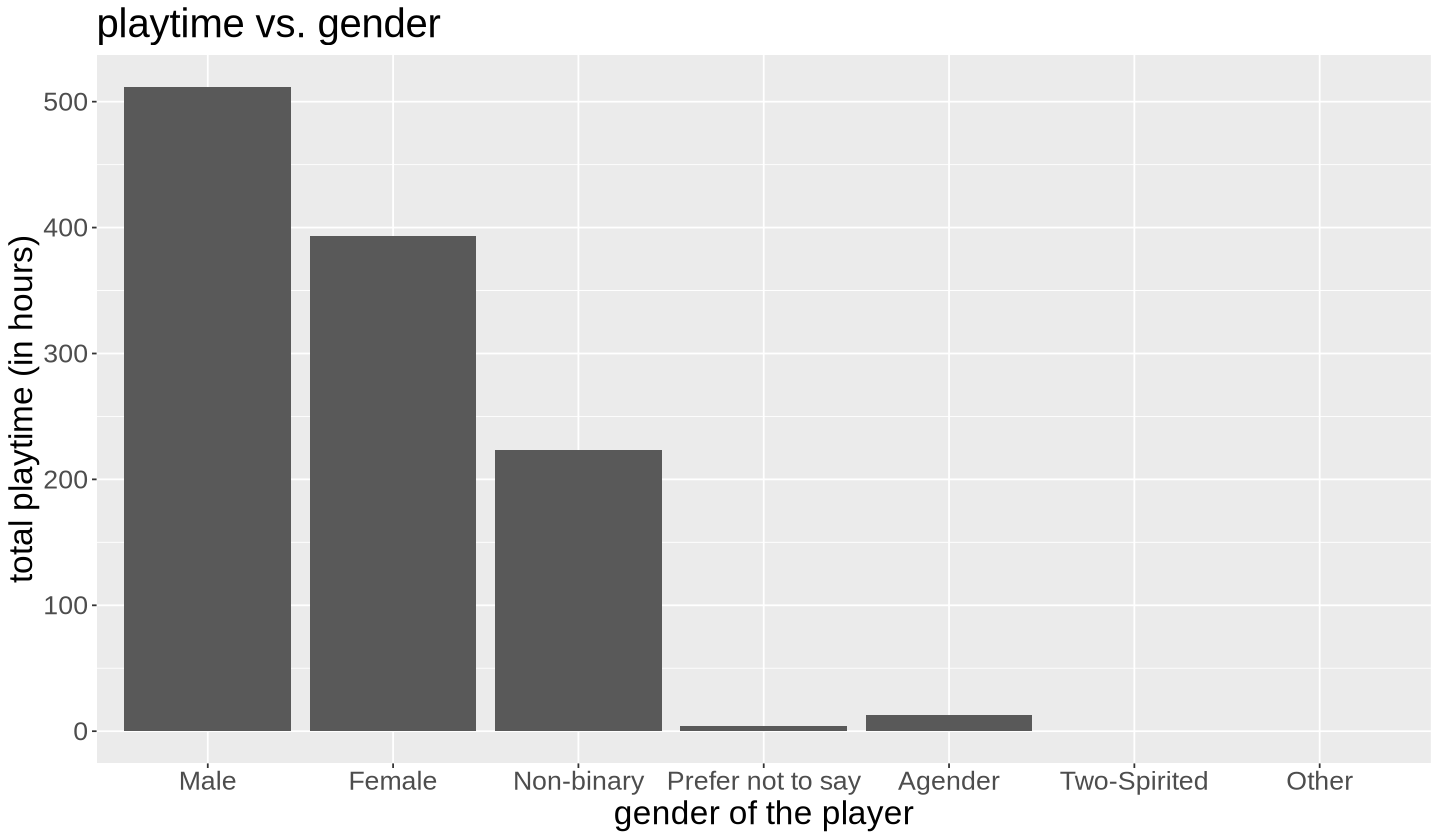

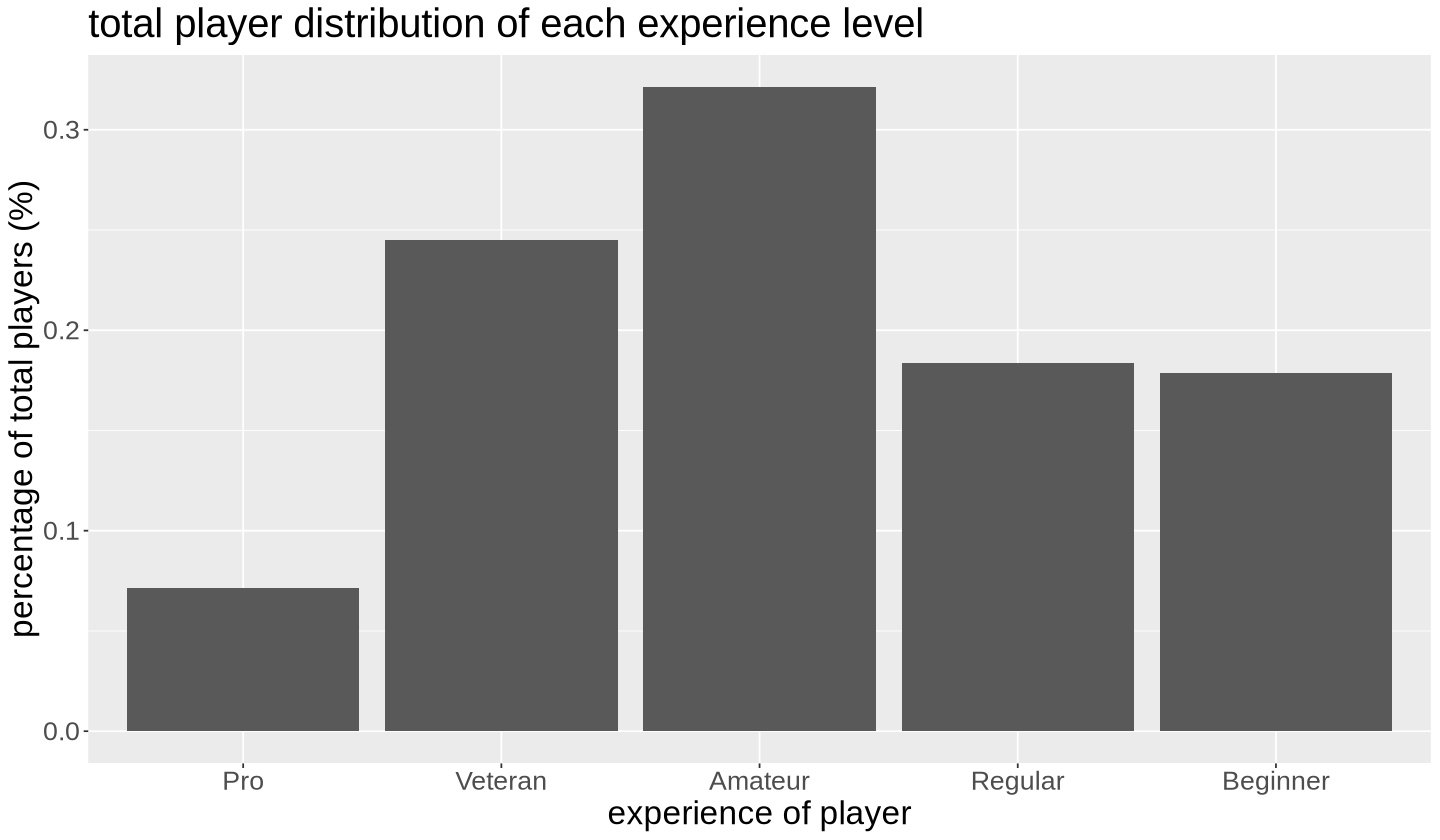

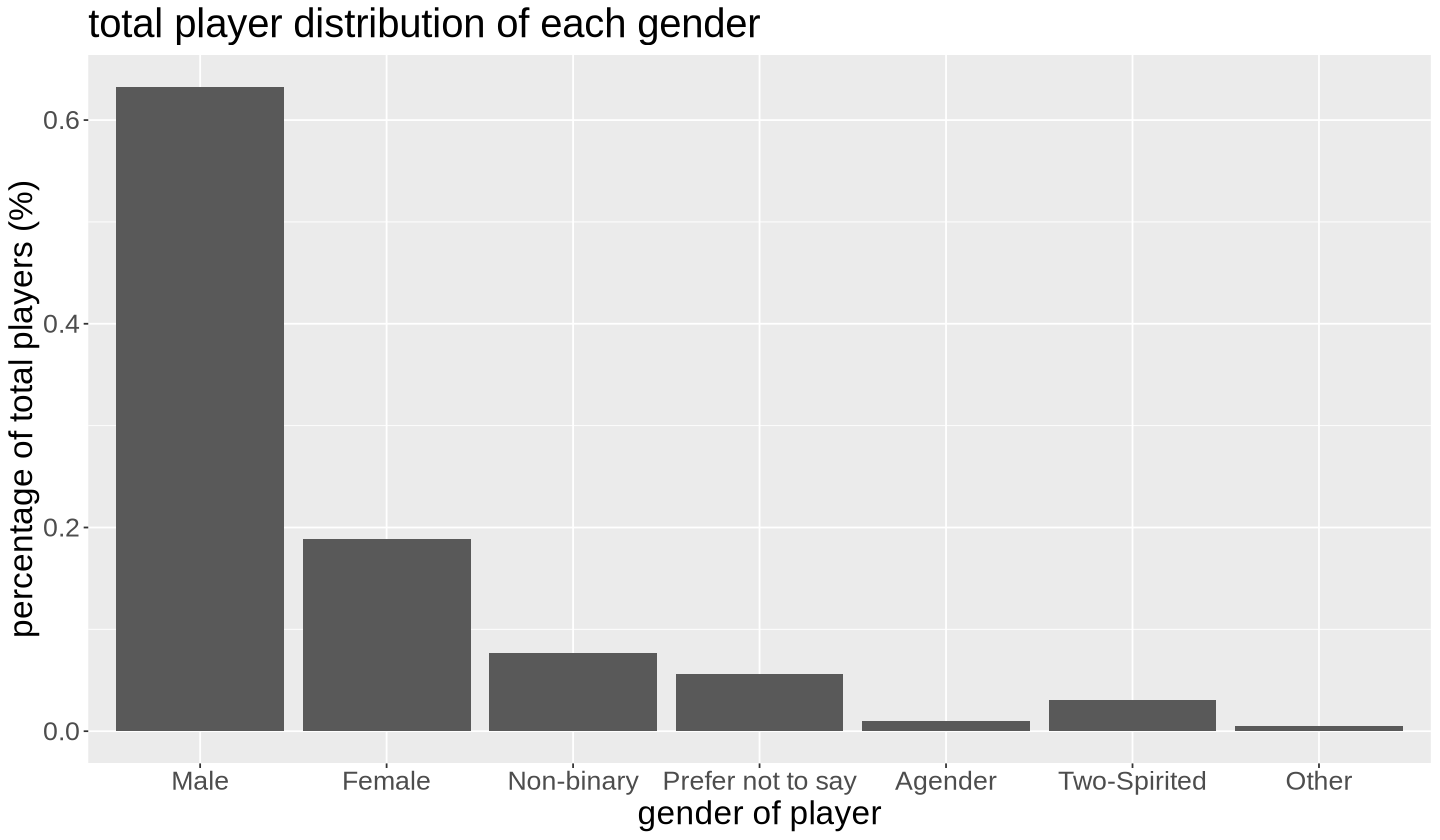

In [9]:
# creating exploratory visuals
options(repr.plot.width = 8, repr.plot.height = 7)

experience_bar_plot <- players_data_wrangled |>
                    ggplot(aes(x = experience, y = played_hours)) +
                    geom_bar(stat = "identity") +
                    labs(x = "level of player experience", y = "total playtime (in hours)", title = "playtime vs. player experience") +
                    theme(text = element_text(size = 20))
experience_bar_plot

options(repr.plot.width = 12, repr.plot.height = 7)

gender_bar_plot <- players_data_wrangled |>
                    ggplot(aes(x = gender, y = played_hours)) +
                    geom_bar(stat = "identity") +
                    labs(x = "gender of the player", y = "total playtime (in hours)", title = "playtime vs. gender") +
                    theme(text = element_text(size = 20))
gender_bar_plot

percentage_exp <- players_data_wrangled |>
                    group_by(experience) |>
                    summarise(count = n()) |>
                    mutate(percentage = count / nrow(players_data_wrangled)) |>
                    ggplot(aes(x = experience, y = percentage)) +
                    geom_bar(stat = "identity") +
                    labs(x = "experience of player", y = "percentage of total players (%)", title = "total player distribution of each experience level") +
                    theme(text = element_text(size = 20))
percentage_exp 

percentage_gender <- players_data_wrangled |>
                    group_by(gender) |>
                    summarise(count = n()) |>
                    mutate(percentage = count / nrow(players_data_wrangled)) |>
                    ggplot(aes(x = gender, y = percentage)) +
                    geom_bar(stat = "identity") +
                    labs(x = "gender of player", y = "percentage of total players (%)", title = "total player distribution of each gender") +
                    theme(text = element_text(size = 20))
percentage_gender  

### Insights from the Visualizations

The exploratory visualizations suggest that players with `Regular` experience contribute the most playtime, while `Veteran` players contribute the least. `Male` players appear to play the most, and `Two-Spirited` players the least. Percentage plots also show how each group is distributed in the dataset which can give us insight into the true level of commitment each group of individuals has to the game.

# PART 4 : Methods and Plan

To address the prediction task, I will use KNN regression, since `played_hours` is a quantitative response variable and its relationship with experience and gender is not very linear. Knn requires very little assumptions about the data provided, which makes it fairly flexible, however the potential weaknesses of knn regression is that it weighs all points equally, making it sensitive to outliers, and has a higher computational cost for larger sets of data.

To select the model, I will tune k using 10-fold cross-validation on the training data and choose the value of 
k that minimizes cross-validated RMSE. The data will be split before preprocessing (70% training, 30% testing) and the training data and testing data will be standardized separately.